<a href="https://colab.research.google.com/github/Smarth2005/A3-Advance-Mathematics/blob/main/Assignment%20solution%20102497023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Advance Mathematics- Assignment-1 <br>  PDF Learning using Roll-Number-Based Transformation

Loading the dataset `data.csv` into colab environment. <br>
Source: https://www.kaggle.com/datasets/shrutibhargava94/india-air-quality-data

In [1]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


### Task-1: Applying Data Transformation ($x \rightarrow z$)

Consider $NO_2$ as feature **x** and transform each value of **x** into **z** using the transformation function given below.

$$z = T_r(x) = x + a_r \sin(b_r  x) \tag{1}$$

where,<br> $a_r = 0.05 \times (r \bmod 7)$
<br>$b_r = 0.3 \times (r \bmod 5 + 1)$

Here, **mod** returns the remainder and **r** is your **UNIVERSITY ROLL NUMBER**.


In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# University Roll Number
r = 102497023

# Calculating constants
a = 0.05*(r % 7)
b = 0.3 *(r % 5 +1)

print(f"Constants for roll number {r}:\na = {a:.4f}\nb = {b:.4f}")

Constants for roll number 102497023:
a = 0.3000
b = 1.2000


In [5]:
# Read the dataset into a DataFrame and extract feature NO2 into x
df = pd.read_csv('data.csv', encoding='latin1')
x  = df['no2'].dropna().values

/tmp/ipython-input-2898592432.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data.csv', encoding='latin1')


In [6]:
# Data transformation
z = x + a * np.sin(b*x)

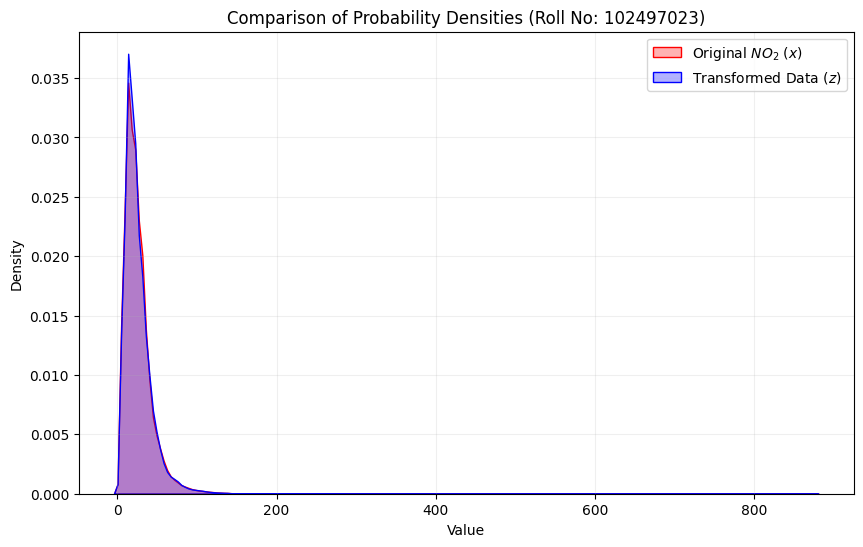

In [9]:
# Visualizing the Density Curve
plt.figure(figsize=(10, 6))

# Plot Density of Original Data (x)
sns.kdeplot(x, color='red', label='Original $NO_2$ ($x$)', fill=True, alpha=0.3)

# Plot Density of Transformed Data (z)
sns.kdeplot(z, color='blue', label='Transformed Data ($z$)', fill=True, alpha=0.3)

# Add labels and styling
plt.title(f'Comparison of Probability Densities (Roll No: {r})')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid(True, alpha=0.2)
plt.show()

### Task-2: Probability Density Function (PDF) Parameter Estimation

Learn the parameters ($c$, $\lambda$, $\mu$) for a probability density function that models the transformed variable $z$. The target model is defined as:


 $$\hat{p}(z) = c \cdot e^{-\lambda(z-\mu)^2}\tag{2}$$

### Mathematical Formulation:

### 1. Determination of Normalization Constant \(c\)

For $\hat{p}(z)$ to be a valid probability density function, it must satisfy:

$$\int_{-\infty}^{\infty} \hat{p}(z)\,dz = 1$$

Substituting the given form:
$$
\int_{-\infty}^{\infty} c \, e^{-\lambda (z-\mu)^2} dz = 1
$$
<br>

$$ c \int_{-\infty}^{\infty}  \, e^{-\lambda (z-\mu)^2} dz = 1
$$

Using the Gaussian integral:
$$
\boxed{\int_{-\infty}^{\infty} e^{-\lambda (z-\mu)^2} dz = \sqrt{\frac{\pi}{\lambda}}}
$$

Hence,
$$
c \sqrt{\frac{\pi}{\lambda}} = 1 \Rightarrow \boxed{c = \sqrt{\frac{\lambda}{\pi}} }
$$

### 2. Likelihood Function

Given a sample of transformed values: $\{z_1, z_2, \dots, z_n\}$

The likelihood function is:
$$
\mathcal{L}(\mu,\lambda) = \prod_{i=1}^{n} \sqrt{\frac{\lambda}{\pi}}
\, e^{-\lambda (z_i-\mu)^2}
$$

Taking logarithm:
$$\log \mathcal{L} =
\frac{n}{2}\log (\frac{\lambda}{\pi})
- \lambda \sum_{i=1}^{n}(z_i-\mu)^2
$$

$$
\boxed{\log \mathcal{L} =
\frac{n}{2}\log \lambda - \frac{n}{2}\log \pi
- \lambda \sum_{i=1}^{n}(z_i-\mu)^2}
$$

### 3. Maximum Likelihood Estimation of $\mu\$

Differentiate log-likelihood w.r.t. $\mu$:
$$
\frac{\partial \log \mathcal{L}}{\partial \mu}
= 2\lambda \sum_{i=1}^{n}(z_i-\mu)
$$

Setting derivative to zero:
$$\sum_{i=1}^{n}(z_i-\mu) = 0$$

$$\sum_{i=1}^{n} z_i - n\mu = 0$$

$$\Rightarrow \boxed{\hat{\mu} = \frac{1}{n}\sum_{i=1}^{n} z_i}$$

### 4. Maximum Likelihood Estimation of $\lambda\$

Differentiate log-likelihood w.r.t. $\lambda\$:
$$
\frac{\partial \log \mathcal{L}}{\partial \lambda}
= \frac{n}{2\lambda} - \sum_{i=1}^{n}(z_i-\mu)^2
$$

Setting derivative to zero:
$$
\frac{n}{2\lambda} = \sum_{i=1}^{n}(z_i-\mu)^2
$$

$$
\frac{1}{2\lambda} = \frac{1}{n}\sum_{i=1}^{n}(z_i-\mu)^2
$$

$$
\frac{1}{2\lambda} = \sigma^2
$$

$$
\Rightarrow \boxed{\hat{\lambda} = \frac{1}{2\sigma^2}}
$$

### 5. Final Estimated Parameters

- $\hat{\mu} = \frac{1}{n}\sum_{i=1}^{n} z_i$

- $\hat{\lambda} = \frac{1}{2\sigma^2}$

- $\hat{c} = \sqrt{\frac{\hat{\lambda}}{\pi}}$


In [10]:
# Calculating Parameters
mu = np.mean(z)

variance = np.var(z)
lambda_val = 1 / (2 * variance)

c = np.sqrt(lambda_val / np.pi)

In [13]:
print(f"Learned Parameters:")
print(f"μ : {mu:.6f}")
print(f"λ : {lambda_val:.6f}")
print(f"c : {c:.6f}")

Learned Parameters:
μ : 25.803054
λ : 0.001459
c : 0.021554


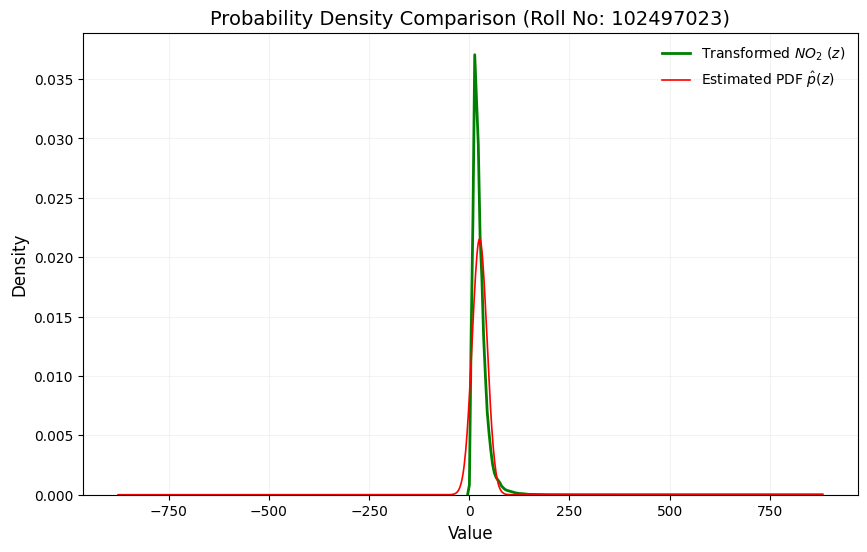

In [17]:
# Visualization: Original Distribution vs. Learned PDF
plt.figure(figsize=(10, 6))

# Transformed Data (z)
sns.kdeplot(z, color='green', label='Transformed $NO_2$ ($z$)', fill=False, lw=2)

# Estimated PDF for Transformed Data (z)
z_range = np.linspace(-max(z), max(z) + 5, 1000)
p_hat = c * np.exp(-lambda_val * (z_range - mu)**2)

plt.plot(z_range, p_hat, color='red', lw=1.2, label=r'Estimated PDF $\hat{p}(z)$')

# Aesthetics for a "Proper" Look
plt.title(f'Probability Density Comparison (Roll No: {r})', fontsize=14)
plt.xlabel('Value', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(frameon=False)
plt.grid(True, alpha=0.15)
plt.show()

The probability density function $\hat{p}(z)$ exhibits a smooth Gaussian profile, which was as expected since the provided model is a variation of the Gaussian distribution. The alignment of the curve with the transformed data confirms that the learned parameters $\mu$ and $\lambda$ effectively capture the central tendency and dispersion of the dataset. By applying Maximum Likelihood Estimation (MLE), we successfully modeled the environmental feature $NO_2$ following the roll-number-parameterized non-linear shift, validating the mathematical robustness of the estimation approach.